In [ ]:
!python -m pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 42.3 MB/s 
     |████████████████████████████████| 86 kB 5.2 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  99294      0 --:--:-- --:--:-- --:--:-- 99294


In [ ]:
!bash ./mecab.sh

Installing automake (A dependency for mecab-ko)
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [62.9 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease

In [ ]:
!curl -O https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.6M  100 19.6M    0     0  19.7M      0 --:--:-- --:--:-- --:--:-- 19.7M


In [ ]:
import pandas as pd
total_data = pd.read_table('./naver_shopping.txt', names=['ratings', 'reviews'])
total_data.head(10)

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요~
9,2,110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...


 regular expression(정규 표현식)

- https://regexr.com/

In [ ]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ratings  200000 non-null  int64 
 1   reviews  200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [ ]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)
len(total_data)

199908

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_data = total_data['reviews']
y_data = total_data['ratings']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((149931,), (49977,), (149931,), (49977,))

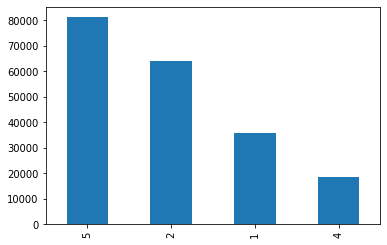

In [21]:
y_data.value_counts().plot(kind='bar')
# 3이 빠져있고, 한쪽(5)으로 쏠려있는 형태
# 빠진 데이터는 채워 넣고, 쏠린 데이터는 밸런스를 맞추어야 함 --> SMOTE 활용

SMTP로 데이터 불균형 처리

- https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

- https://mkjjo.github.io/python/2019/01/04/smote_duplicate.html

- https://john-analyst.medium.com/smote%EB%A1%9C-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%88%EA%B7%A0%ED%98%95-%ED%95%B4%EA%B2%B0%ED%95%98%EA%B8%B0-5ab674ef0b32

# NLP

In [ ]:
# x_train.str,replace('[가-힣ㄱ-ㅎㅠ]'.'')

In [22]:
x_temp01 = x_train
x_temp01.str.replace('[^가-힣ㄱ-ㅎㅠ]','')

69691                                        감자가좀작네요그래도맛있네요
191041                                        완전핏이이쁘고원단넘조아요
90041                              너무얇네요생각은했지만밑판도미끄러워서불편하네요
92200                                         둘째랑공원서하니좋아하네요
159222                                   그냥봉지만빼서버려도되고편해서좋아요
                                ...                        
91203                                     순정보다확실시내연비올라서좋습니다
20811     배송제품가격대비품질도그럭저럭이구배송도엄청느리구주문한지주가다되가서제품이도착하구싸이트에...
113514                                         괜찮아요괜찮아요괜찮아요
7393                                예쁘긴한데요싸이즈가좀작아서용도에제약이있어요
184488                                    배송이너무늦고양도가격에비해적어요
Name: reviews, Length: 149931, dtype: object

In [23]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ ]','') # [a-zA-Z ]

69691                                        감자가좀작네요그래도맛있네요
191041                                   완전 핏이 이쁘고 원단 넘 조아요
90041                         너무 얇네요 생각은했지만 밑판도 미끄러워서 불편하네요
92200                                      둘째랑 공원서 하니 좋아하네요
159222                              그냥 봉지만 빼서 버려도되고 편해서 좋아요
                                ...                        
91203                                순정보다 확실 시내 연비 올라서 좋습니다
20811     배송제품 가격대비품질도그럭저럭이구 배송도엄청느리구 주문한지 주가다되가서 제품이도착하...
113514                                         괜찮아요괜찮아요괜찮아요
7393                          예쁘긴한데요 싸이즈가 좀 작아서 용도에 제약이 있어요
184488                              배송이 너무 늦고 양도 가격에 비해 적어요
Name: reviews, Length: 149931, dtype: object

In [24]:
from konlpy.tag import Mecab

In [25]:
mecab = Mecab()
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는게 나을 것 같다.'))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '것', '같', '다', '.']


In [26]:
x_train_small = x_train[0:5000]

In [ ]:
sentence = list()
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

for tok in x_train_small:
  encoded = mecab.morphs(tok)
  sentence.append([item for item in encoded if item not in stopwords])

sentence


# Tokenizer

In [29]:
print(sentence)

[['감자', '좀', '작', '네요', '~~', '그래도', '맛있', '네요'], ['완전', '핏', '이쁘', '원단', '넘', '조아', '요'], ['너무', '얇', '네요', '생각', '했', '지만', '밑판', '미끄러워서', '불편', '네요'], ['둘째', '랑', '공원', '서', '니', '좋', '아', '네요', '.'], ['그냥', '봉지', '만', '빼', '서', '버려도', '되', '편해서', '좋', '아요'], ['이게', '내용물', '시멘트', '인가요', '.', '..?', '석면', '?', '회색', '모래', '?', '계속', '나오', '네여', '.', '..'], ['두', '시간', '뚫', '엇', '는데', '뚫리', '않', '네요', 'ᆞ역시', '사람', '불러야', '할', '것', '같', '습니다'], ['역시', '제품', '배송', '무척', '빠르', '상품', '좋', '습니다', '장모님', '사', '드리', '저', '3', '개', '째', '입니다', '전자', '렌지', '3', '분', '면', '뜨끈', '합니다'], ['아주', '잔', '스크래치', '만', '지워', '고요', '.', '..', '조금', '라도', '파인', '거', '안', '지워짐', '.', '..', '제품', '너무', '믿', '으면', '안', '되', '요', '.', '..'], ['상품', '잘', '포장', '되', '어', '배송', '되', '었', '지만', '등받이', '부분', '찍힌', '자국', '있', '는데', '살짝', '칠', '해서', '보냈', '네요', '.', 'ㅠ', '막', '쓰', '려고', '산', '거', '라', '그냥', '쓰', '기', '로', '했', '어요', '.', '잘', '검수', '해서', '보내', '주', '셨', '으면', '좋', '겠', '네요', '.', '알', '보내', '신', '찜찜

In [30]:
import tensorflow as tf

In [31]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentence)

In [32]:
tokenizer.word_index

{'.': 1,
 '네요': 2,
 '좋': 3,
 '어요': 4,
 '는데': 5,
 '아요': 6,
 '잘': 7,
 '있': 8,
 '안': 9,
 '구매': 10,
 '습니다': 11,
 '너무': 12,
 '했': 13,
 '배송': 14,
 '같': 15,
 '거': 16,
 '!': 17,
 '먹': 18,
 '어': 19,
 '되': 20,
 '합니다': 21,
 '~': 22,
 '않': 23,
 '..': 24,
 '요': 25,
 '기': 26,
 '재': 27,
 '아': 28,
 '쓰': 29,
 '것': 30,
 '사용': 31,
 '없': 32,
 '보다': 33,
 '았': 34,
 '로': 35,
 '나': 36,
 '해서': 37,
 '으로': 38,
 '만': 39,
 '지만': 40,
 '겠': 41,
 '아서': 42,
 '보': 43,
 '생각': 44,
 '었': 45,
 '서': 46,
 '주': 47,
 '주문': 48,
 '해요': 49,
 '제품': 50,
 '그냥': 51,
 '어서': 52,
 '좀': 53,
 '면': 54,
 '가격': 55,
 '만족': 56,
 ',': 57,
 '해': 58,
 '입니다': 59,
 '라': 60,
 '받': 61,
 '사': 62,
 '사이즈': 63,
 '할': 64,
 '빠르': 65,
 '많이': 66,
 '니': 67,
 '개': 68,
 '별로': 69,
 '때': 70,
 '샀': 71,
 '더': 72,
 '맛': 73,
 '에서': 74,
 '작': 75,
 '왔': 76,
 '입': 77,
 '번': 78,
 '?': 79,
 '시': 80,
 '음': 81,
 'ㅠㅠ': 82,
 '포장': 83,
 '맞': 84,
 '던': 85,
 '맛있': 86,
 '두': 87,
 '다른': 88,
 '수': 89,
 '세요': 90,
 'ㅠ': 91,
 '^^': 92,
 '넘': 93,
 '괜찮': 94,
 '아니': 95,
 '정말': 96,
 '에요':

In [33]:
tokenizer.word_counts

OrderedDict([('감자', 2),
             ('좀', 285),
             ('작', 200),
             ('네요', 1780),
             ('~~', 118),
             ('그래도', 58),
             ('맛있', 169),
             ('완전', 102),
             ('핏', 19),
             ('이쁘', 63),
             ('원단', 23),
             ('넘', 141),
             ('조아', 34),
             ('요', 417),
             ('너무', 730),
             ('얇', 86),
             ('생각', 301),
             ('했', 728),
             ('지만', 323),
             ('밑판', 1),
             ('미끄러워서', 1),
             ('불편', 105),
             ('둘째', 5),
             ('랑', 81),
             ('공원', 2),
             ('서', 294),
             ('니', 217),
             ('좋', 1596),
             ('아', 394),
             ('.', 3820),
             ('그냥', 286),
             ('봉지', 10),
             ('만', 338),
             ('빼', 33),
             ('버려도', 1),
             ('되', 464),
             ('편해서', 4),
             ('아요', 972),
             ('이게', 24),
             ('내용

In [36]:
total_cnt = len(tokenizer.word_index)

rare_cnt = 0
total_freq, rare_freq = 0, 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value # 전체 단어 수
  if(value <= 2):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value # 2미만인 단어 수

In [35]:
total_cnt, rare_cnt, (rare_cnt / total_cnt)*100, (rare_freq/total_freq)*100

(7892, 5150, 65.25595539787126, 7.569725892707259)

In [37]:
vocab_size = total_cnt - rare_cnt

OOV(Out-Of-Vocabulary)

- https://stackoverflow.com/questions/45495190/initializing-out-of-vocabulary-oov-tokens

- https://codetorial.net/tensorflow/natural_language_processing_in_tensorflow_01.html

In [38]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(sentence)

### ['후기', '엄청', '맛있', '다고', [], '구입', '했', [], '기대', '커서', '그런가', [], [], [], '번', '안', '먹', '것', '같', '아요']

In [39]:
tokenizer.index_word

{1: 'OOV',
 2: '.',
 3: '네요',
 4: '좋',
 5: '어요',
 6: '는데',
 7: '아요',
 8: '잘',
 9: '있',
 10: '안',
 11: '구매',
 12: '습니다',
 13: '너무',
 14: '했',
 15: '배송',
 16: '같',
 17: '거',
 18: '!',
 19: '먹',
 20: '어',
 21: '되',
 22: '합니다',
 23: '~',
 24: '않',
 25: '..',
 26: '요',
 27: '기',
 28: '재',
 29: '아',
 30: '쓰',
 31: '것',
 32: '사용',
 33: '없',
 34: '보다',
 35: '았',
 36: '로',
 37: '나',
 38: '해서',
 39: '으로',
 40: '만',
 41: '지만',
 42: '겠',
 43: '아서',
 44: '보',
 45: '생각',
 46: '었',
 47: '서',
 48: '주',
 49: '주문',
 50: '해요',
 51: '제품',
 52: '그냥',
 53: '어서',
 54: '좀',
 55: '면',
 56: '가격',
 57: '만족',
 58: ',',
 59: '해',
 60: '입니다',
 61: '라',
 62: '받',
 63: '사',
 64: '사이즈',
 65: '할',
 66: '빠르',
 67: '많이',
 68: '니',
 69: '개',
 70: '별로',
 71: '때',
 72: '샀',
 73: '더',
 74: '맛',
 75: '에서',
 76: '작',
 77: '왔',
 78: '입',
 79: '번',
 80: '?',
 81: '시',
 82: '음',
 83: 'ㅠㅠ',
 84: '포장',
 85: '맞',
 86: '던',
 87: '맛있',
 88: '두',
 89: '다른',
 90: '수',
 91: '세요',
 92: 'ㅠ',
 93: '^^',
 94: '넘',
 95: '괜찮',
 96: '아니',
 97: 

In [40]:
x_train_small = tokenizer.texts_to_sequences(sentence)

In [41]:
print(x_train_small[0:3])

[[1, 54, 76, 3, 116, 230, 87, 3], [140, 566, 212, 487, 94, 362, 26], [13, 163, 3, 45, 14, 41, 1, 1, 135, 3]]


In [42]:
len(x_train_small[0]), len(x_train_small[40]), len(x_train_small[50])

(8, 53, 6)

In [43]:
hist_len = [len(words) for words in x_train_small]

(array([ 19.,  72., 418., 339., 359., 602., 246., 434., 180., 148., 271.,
        116.,  92., 214.,  91., 192.,  93.,  86., 135.,  65.,  71., 117.,
         42.,  91.,  50.,  43.,  78.,  36.,  49.,  30.,  29.,  43.,  17.,
         10.,  35.,  10.,  22.,  13.,   7.,  12.,   7.,   5.,   3.,   3.,
          3.,   1.,   0.,   0.,   0.,   1.]),
 array([ 1.  ,  2.38,  3.76,  5.14,  6.52,  7.9 ,  9.28, 10.66, 12.04,
        13.42, 14.8 , 16.18, 17.56, 18.94, 20.32, 21.7 , 23.08, 24.46,
        25.84, 27.22, 28.6 , 29.98, 31.36, 32.74, 34.12, 35.5 , 36.88,
        38.26, 39.64, 41.02, 42.4 , 43.78, 45.16, 46.54, 47.92, 49.3 ,
        50.68, 52.06, 53.44, 54.82, 56.2 , 57.58, 58.96, 60.34, 61.72,
        63.1 , 64.48, 65.86, 67.24, 68.62, 70.  ]),
 <a list of 50 Patch objects>)

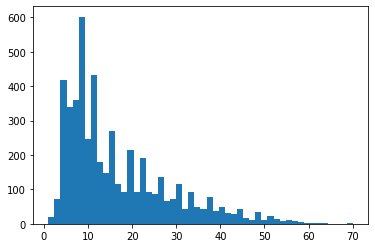

In [44]:
import matplotlib.pyplot as plt
plt.hist(hist_len, bins=50)

In [45]:
sum(hist_len) / len(x_train_small)
# 너무 많은 값이 잘려나가기 때문에 채우는 방법으로 선회

16.6796

In [46]:
x_train_small = tf.keras.preprocessing.sequence.pad_sequences(x_train_small, maxlen=50)

In [47]:
y_train_small = y_train[0:5000]

In [49]:
import numpy as np
y_train_small = np.array(y_train_small)-1
np.unique(y_train_small)

array([0, 1, 3, 4])

In [50]:
# y_train_small[6] = 3

In [51]:
# y_train_small[6]

In [52]:
# y_train_small[0:6]

In [53]:
len(x_train_small), len(y_train_small)

(5000, 5000)

In [54]:
# y_train_onehot = tf.keras.utils.to_categorical(y_train_small)
# len(y_train_onehot[5])

In [56]:
# len(y_train_onehot[5]), y_train_onehot[5]

# make model

In [57]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=30, input_length=50)) # input layer
# model.add(tf.keras.layers.LSTM(128)) # hidden layer
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))) # hidden layer
# model.add(tf.keras.layers.GRU(128)) # hidden layer

model.add(tf.keras.layers.Dense(5, activation='softmax')) # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc']) # gadget

In [58]:
hist = model.fit(x_train_small, y_train_small, epochs=2, batch_size=256, validation_split=0.3, shuffle=True)

Epoch 1/2
14/14 [==============================] - 12s 574ms/step - loss: 1.4427 - acc: 0.3931 - val_loss: 1.3227 - val_acc: 0.4700
Epoch 2/2
14/14 [==============================] - 7s 498ms/step - loss: 1.2837 - acc: 0.3711 - val_loss: 1.2618 - val_acc: 0.4133


In [ ]:
# model.evaluate(x_train_small, y_train_small) # LSTM(128) - loss: 0.9170 - acc: 0.8500

In [ ]:
# model.evaluate(x_train_small, y_train_small) # GRU - loss: 0.9265 - acc: 0.8436

In [ ]:
# model.evaluate(x_train_small, y_train_small) # Bidirectional(LSTM(128)) - loss: 0.8787 - acc: 0.8382